<a href="https://colab.research.google.com/github/dudesparsh/100-days-of-code/blob/master/Keras%20Fashion%20MNIST%20Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for Image Classification 


------------

## The Challenge

**Our task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
# Importing the data
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 1us/step


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

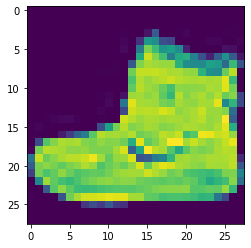

In [6]:
# Viewing the first training image
plt.imshow(x_train[0])

In [0]:
# Normalizing the x_train & x_test

In [11]:
x_train.max()

255

In [0]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train.shape 

(60000, 28, 28)

In [0]:
# Adding a channel parameter
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28, 1)

In [0]:
from keras.utils.np_utils import to_categorical

In [19]:
y_train.shape

(60000,)

In [0]:
# Applying one hot encoding to convert final result into categories
y_example = to_categorical(y_train)

In [21]:
y_test.shape

(10000,)

In [0]:
# Applying one hot encoding to convert into categories
y_test_example = to_categorical(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [27]:
# # Creating the CNN model having following structure
# * 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
# * Pooling Layer where pool_size = (2,2)
# * Flatten Layer
# * Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation
# * Final Dense Layer of 10 Neurons with a softmax activation
# **Then compiling the model with these parameters: 
# loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']

model = Sequential()

# Adding Convulational layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
# pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flattening images from 28 by 28 to 764 before final layer
model.add(Flatten())

# 128 Neurons in the dense hidden layer
model.add(Dense(128, activation='relu') )

# Last layer is classification
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [28]:
# Checking the structure of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Training the model
model.fit(x_train, y_example, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 21s 355us/step - loss: 0.3985 - acc: 0.8589
Epoch 2/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.2765 - acc: 0.9010
Epoch 3/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.2377 - acc: 0.9150
Epoch 4/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.2107 - acc: 0.9248
Epoch 5/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1928 - acc: 0.9308
Epoch 6/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.1808 - acc: 0.9363
Epoch 7/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1666 - acc: 0.9410
Epoch 8/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1561 - acc: 0.9455
Epoch 9/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1482 - 

In [30]:
# Printing the model metrics for evaluation
model.metrics_names

['loss', 'acc']

In [31]:
model.evaluate(x_test, y_test_example)

10000/10000 [==============================] - 1s 52us/step


[0.33890156950950623, 0.9098]

In [0]:
# For generating classification report
from sklearn.metrics import classification_report

In [0]:
# Using model to predict classes
predictions = model.predict_classes(x_test)

In [34]:
y_test_example.shape

(10000, 10)

In [35]:
predictions[0]

9

In [38]:
print(classification_report(y_test, predictions))
# Our model is giving 91% accuracy

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.90      0.80      0.85      1000
           3       0.94      0.89      0.91      1000
           4       0.80      0.93      0.86      1000
           5       0.98      0.97      0.98      1000
           6       0.78      0.73      0.75      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

